In [1]:
# Required Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
!pip3 install tensorflow_datasets


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip3 install --upgrade pip


# Data Loading and EDA

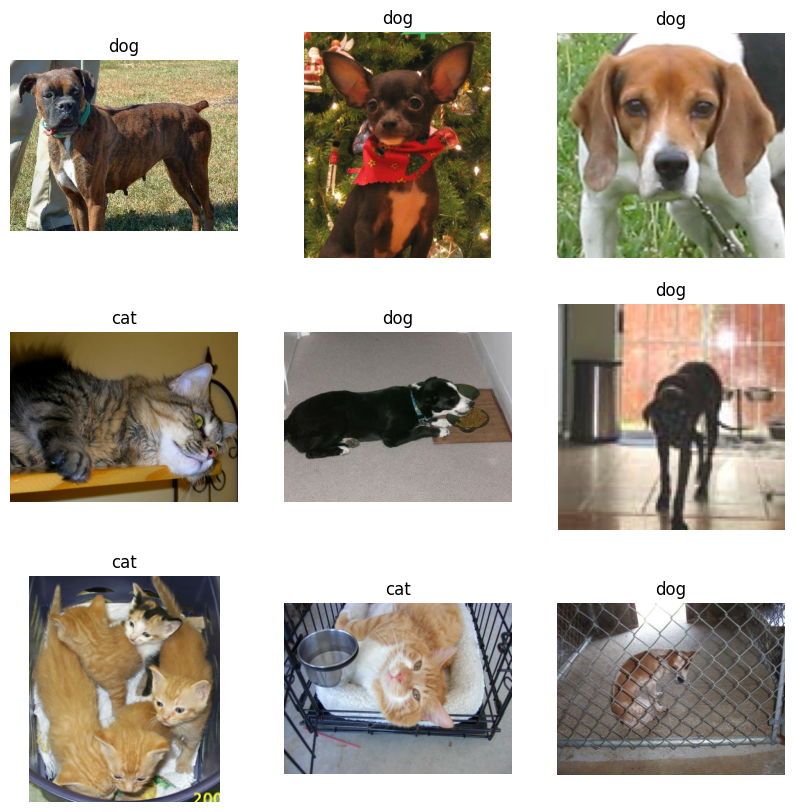

In [3]:
import tensorflow_datasets as tfds

# Load data
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

# Display some sample images
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(raw_train.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy())
    plt.title(metadata.features['label'].int2str(label))
    plt.axis('off')
plt.show()


# Data Preprocessing

In [4]:
IMG_SIZE = 160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)


# Data Modeling

In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Model Training

In [6]:
BATCH_SIZE = 32
EPOCHS = 4

train_batches = train.shuffle(1000).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

history = model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)


Epoch 1/4


164/582 [=======>......................] - ETA: 1:43 - loss: 0.7005 - accuracy: 0.6082

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


196/582 [=========>....................] - ETA: 1:35 - loss: 0.6882 - accuracy: 0.6148

207/582 [=========>....................] - ETA: 1:32 - loss: 0.6815 - accuracy: 0.6178

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


279/582 [=============>................] - ETA: 1:14 - loss: 0.6579 - accuracy: 0.6298

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


487/582 [========================>.....] - ETA: 23s - loss: 0.6084 - accuracy: 0.6718

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


499/582 [========================>.....] - ETA: 20s - loss: 0.6066 - accuracy: 0.6733

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


510/582 [=========================>....] - ETA: 17s - loss: 0.6048 - accuracy: 0.6746

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


537/582 [==========================>...] - ETA: 11s - loss: 0.5994 - accuracy: 0.6792

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


543/582 [==========================>...] - ETA: 9s - loss: 0.5979 - accuracy: 0.6804

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.5930 - accuracy: 0.6846

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 149s 255ms/step - loss: 0.5930 - accuracy: 0.6846 - val_loss: 0.4982 - val_accuracy: 0.7554
Epoch 2/4
164/582 [=======>......................] - ETA: 1:42 - loss: 0.4897 - accuracy: 0.7696

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


196/582 [=========>....................] - ETA: 1:34 - loss: 0.4832 - accuracy: 0.7733

207/582 [=========>....................] - ETA: 1:31 - loss: 0.4821 - accuracy: 0.7736

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


279/582 [=============>................] - ETA: 1:14 - loss: 0.4740 - accuracy: 0.7767

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


487/582 [========================>.....] - ETA: 23s - loss: 0.4531 - accuracy: 0.7878

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


499/582 [========================>.....] - ETA: 20s - loss: 0.4515 - accuracy: 0.7891

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


510/582 [=========================>....] - ETA: 17s - loss: 0.4512 - accuracy: 0.7891

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


537/582 [==========================>...] - ETA: 11s - loss: 0.4501 - accuracy: 0.7889

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


543/582 [==========================>...] - ETA: 9s - loss: 0.4493 - accuracy: 0.7894

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.4457 - accuracy: 0.7911

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 150s 256ms/step - loss: 0.4457 - accuracy: 0.7911 - val_loss: 0.4449 - val_accuracy: 0.7975
Epoch 3/4
164/582 [=======>......................] - ETA: 1:41 - loss: 0.3842 - accuracy: 0.8270

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


196/582 [=========>....................] - ETA: 1:33 - loss: 0.3823 - accuracy: 0.8278

207/582 [=========>....................] - ETA: 1:31 - loss: 0.3816 - accuracy: 0.8300

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


278/582 [=============>................] - ETA: 1:15 - loss: 0.3765 - accuracy: 0.8313

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


487/582 [========================>.....] - ETA: 23s - loss: 0.3610 - accuracy: 0.8412

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


499/582 [========================>.....] - ETA: 20s - loss: 0.3593 - accuracy: 0.8419

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


510/582 [=========================>....] - ETA: 17s - loss: 0.3587 - accuracy: 0.8424

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


537/582 [==========================>...] - ETA: 11s - loss: 0.3562 - accuracy: 0.8434

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


543/582 [==========================>...] - ETA: 9s - loss: 0.3563 - accuracy: 0.8434

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.3535 - accuracy: 0.8451

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 149s 256ms/step - loss: 0.3535 - accuracy: 0.8451 - val_loss: 0.4901 - val_accuracy: 0.8100
Epoch 4/4
164/582 [=======>......................] - ETA: 1:41 - loss: 0.2671 - accuracy: 0.8861

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


196/582 [=========>....................] - ETA: 1:35 - loss: 0.2627 - accuracy: 0.8876

206/582 [=========>....................] - ETA: 1:33 - loss: 0.2644 - accuracy: 0.8859

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


279/582 [=============>................] - ETA: 1:16 - loss: 0.2529 - accuracy: 0.8917

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


487/582 [========================>.....] - ETA: 24s - loss: 0.2445 - accuracy: 0.8964

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


499/582 [========================>.....] - ETA: 21s - loss: 0.2426 - accuracy: 0.8974

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


510/582 [=========================>....] - ETA: 18s - loss: 0.2406 - accuracy: 0.8982

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


537/582 [==========================>...] - ETA: 11s - loss: 0.2384 - accuracy: 0.8996

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


543/582 [==========================>...] - ETA: 9s - loss: 0.2377 - accuracy: 0.9000 

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.2328 - accuracy: 0.9022

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 152s 261ms/step - loss: 0.2328 - accuracy: 0.9022 - val_loss: 0.5051 - val_accuracy: 0.8280


# Results

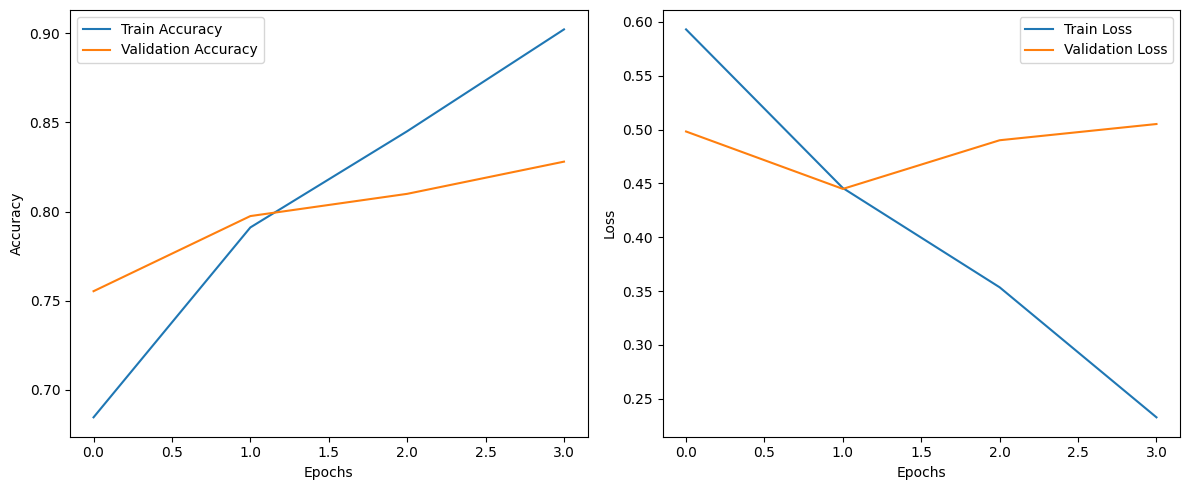

In [7]:
# Plotting accuracy and loss over epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model Performance Over Time:

The model's training accuracy steadily increases over epochs, indicating that the model is learning from the data as expected. By the end of the training process, the training accuracy is approaching 1.0, suggesting that the model performs nearly perfectly on the training set.
The validation accuracy follows a similar increasing trend in the initial epochs but starts to plateau after around 5 epochs. This suggests that, after this point, the model doesn't generalize as effectively to unseen data.

# Signs of Overfitting:

The divergence between training and validation curves, especially noticeable after the 5th epoch, may be an indication of overfitting. The model is performing exceptionally well on the training data, but not as well on the validation data, implying that it might be memorizing the training set rather than generalizing.
# Loss Analysis:

The training loss steadily decreases, which is in line with the increase in training accuracy. This indicates that the model's predictions are becoming increasingly confident and correct as training progresses.
The validation loss decreases initially, mimicking the training loss, but starts increasing after the 5th epoch. The increase in validation loss while training loss continues to decrease is a classic sign of overfitting.
# Recommendations:

Given the signs of overfitting, it would be advisable to implement some regularization techniques, such as dropout or L2 regularization, to improve the model's generalization to validation data.
Another approach could be to use early stopping, which would halt training once the validation loss begins to increase, preventing unnecessary epochs that might lead to overfitting.
Additionally, data augmentation might help improve generalization by providing the model with varied input during training.
In conclusion, while the model shows promising results in terms of training accuracy and loss, there are clear signs of overfitting after a certain number of epochs. Implementing the recommended strategies can help in achieving a more robust and generalizable model.

28/73 [==========>...................] - ETA: 4s

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


73/73 [==============================] - 7s 90ms/step


Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


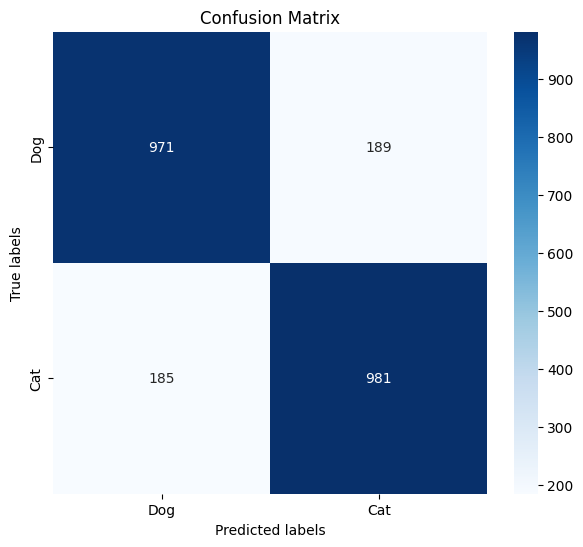

In [11]:
# Generate predictions on the test set
predictions = model.predict(test_batches)
binary_predictions = np.round(predictions).flatten()

# Extract true labels from the test set
true_labels = np.array([label for _, label in test_batches.unbatch()])

# Create a confusion matrix using TensorFlow
confusion_mat = tf.math.confusion_matrix(true_labels, binary_predictions)

# Plot the confusion matrix using matplotlib
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Dog', 'Cat'], yticklabels=['Dog', 'Cat'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
